# PROYECTO FINAL - PREDICCIÓN DE PRECIOS INMOBILIARIOS EN COLOMBIA

## Secciones del Análisis:
1. **Carga y Exploración Inicial** - Ver estructura de los datasets
2. **Análisis Exploratorio de Datos (EDA)** - Estadísticas, distribuciones, correlaciones
3. **Preprocesamiento** - Limpieza, feature engineering, train/test split
4. **Modelado** - Baseline, Random Forest, XGBoost, Ensemble
5. **Evaluación y Resultados** - Métricas, gráficos, comparaciones
6. **Conclusiones** - Interpretación y recomendaciones

---

## 1 CARGA Y EXPLORACIÓN INICIAL DE DATASETS

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("="*80)
print("🏠 PREDICCIÓN DE PRECIOS INMOBILIARIOS EN COLOMBIA - PROYECTO FINAL")
print("="*80)
print("\n Librerías cargadas exitosamente\n")

🏠 PREDICCIÓN DE PRECIOS INMOBILIARIOS EN COLOMBIA - PROYECTO FINAL

 Librerías cargadas exitosamente



In [3]:
# Cargar datasets
print("📂 Cargando datasets...")
print("-"*80)

# Rutas relativas desde la carpeta notebooks
ruta_bogota = '../data/properties.csv'
ruta_colombia = '../data/co_properties.csv'

# Cargar con manejo de errores
try:
    df_bogota = pd.read_csv(ruta_bogota)
    print(f"✅ Dataset Bogotá cargado: {df_bogota.shape[0]:,} filas x {df_bogota.shape[1]} columnas")
except Exception as e:
    print(f"❌ Error cargando Bogotá: {e}")
    df_bogota = None

try:
    df_colombia = pd.read_csv(ruta_colombia)
    print(f"✅ Dataset Colombia cargado: {df_colombia.shape[0]:,} filas x {df_colombia.shape[1]} columnas")
except Exception as e:
    print(f"❌ Error cargando Colombia: {e}")
    df_colombia = None

print("\n" + "="*80)

📂 Cargando datasets...
--------------------------------------------------------------------------------
✅ Dataset Bogotá cargado: 585 filas x 21 columnas
✅ Dataset Colombia cargado: 1,000,000 filas x 25 columnas

✅ Dataset Colombia cargado: 1,000,000 filas x 25 columnas



In [4]:
# Explorar estructura de cada dataset
def explorar_estructura(df, nombre):
    """Muestra información detallada de la estructura del dataset"""
    if df is None:
        print(f"  Dataset {nombre} no disponible\n")
        return
    
    print(f"\n{'='*80}")
    print(f" ESTRUCTURA DEL DATASET: {nombre}")
    print(f"{'='*80}\n")
    
    print(f" Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas\n")
    
    print(f" Columnas disponibles:")
    for i, col in enumerate(df.columns, 1):
        tipo = str(df[col].dtype)
        nulos = df[col].isnull().sum()
        pct_nulos = (nulos / len(df)) * 100
        unicos = df[col].nunique()
        print(f"   {i:2d}. {col:25s} | Tipo: {tipo:10s} | Nulos: {nulos:6,} ({pct_nulos:5.1f}%) | Únicos: {unicos:,}")
    
    print(f"\n Primeras 3 filas:")
    display(df.head(3))
    
    print(f"\n Información de memoria:")
    print(f"   Uso total: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print("\n" + "="*80)

# Explorar ambos datasets
if df_bogota is not None:
    explorar_estructura(df_bogota, "BOGOTÁ")

if df_colombia is not None:
    explorar_estructura(df_colombia, "COLOMBIA NACIONAL")


 ESTRUCTURA DEL DATASET: BOGOTÁ

 Dimensiones: 585 filas x 21 columnas

 Columnas disponibles:
    1. conjunto                  | Tipo: object     | Nulos:      0 (  0.0%) | Únicos: 509
    2. administración            | Tipo: int64      | Nulos:      0 (  0.0%) | Únicos: 368
    3. estrato                   | Tipo: float64    | Nulos:      2 (  0.3%) | Únicos: 6
    4. antiguedad                | Tipo: int64      | Nulos:      0 (  0.0%) | Únicos: 43
    5. remodelado                | Tipo: object     | Nulos:      3 (  0.5%) | Únicos: 2
    6. área                      | Tipo: float64    | Nulos:      0 (  0.0%) | Únicos: 86
    7. habitaciones              | Tipo: int64      | Nulos:      0 (  0.0%) | Únicos: 6
    8. baños                     | Tipo: int64      | Nulos:      0 (  0.0%) | Únicos: 5
    9. garajes                   | Tipo: int64      | Nulos:      0 (  0.0%) | Únicos: 4
   10. elevadores                | Tipo: int64      | Nulos:      0 (  0.0%) | Únicos: 5
   11. t

,conjunto,administración,estrato,antiguedad,remodelado,área,habitaciones,baños,garajes,elevadores,tipo_de_inmueble,deposito,porteria,zona_de_lavanderia,gas,parqueadero,precio,direccion,nombre,descripcion,barrio
0,Santa Mónica,532000,4.0,37,Si,86.0,1,1,1,1,Apartamento,0,24 hrs,No Tiene,Si,No,313900000.0,Avenida Carrera 3 # 59-65,Santa Mónica,"Apartamento en venta de 86 m2, con vista exter...",PARDO RUBIO
1,Chicó Milano 101,0,6.0,7,Si,77.0,1,2,2,1,Apartamento,1,24 hrs,No Tiene,Si,Si,440100000.0,Carrera 12 #101A-18,Chicó Milano 101,"Apartamento en venta de 77m2, con vista interi...",USAQUEN
2,Portal del Belmira,811893,4.0,14,Si,109.0,3,4,2,1,Apartamento,0,24 hrs,No Tiene,Si,Si,495000000.0,Calle 146 #7F-54,Portal del Belmira,"Apartamento en venta de 109 m2, con vista Inte...",LOS CEDROS



 Información de memoria:
   Uso total: 1.13 MB


 ESTRUCTURA DEL DATASET: COLOMBIA NACIONAL

 Dimensiones: 1,000,000 filas x 25 columnas

 Columnas disponibles:
    1. id                        | Tipo: object     | Nulos:      0 (  0.0%) | Únicos: 1,000,000
    2. ad_type                   | Tipo: object     | Nulos:      0 (  0.0%) | Únicos: 1
    3. start_date                | Tipo: object     | Nulos:      0 (  0.0%) | Únicos: 371
    1. id                        | Tipo: object     | Nulos:      0 (  0.0%) | Únicos: 1,000,000
    2. ad_type                   | Tipo: object     | Nulos:      0 (  0.0%) | Únicos: 1
    3. start_date                | Tipo: object     | Nulos:      0 (  0.0%) | Únicos: 371
    4. end_date                  | Tipo: object     | Nulos:      0 (  0.0%) | Únicos: 449
    5. created_on                | Tipo: object     | Nulos:      0 (  0.0%) | Únicos: 371
    6. lat                       | Tipo: float64    | Nulos: 259,719 ( 26.0%) | Únicos: 168,888
    7.

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,KsjahK62rxcYKXXQjOdkqw==,Propiedad,2020-10-07,2021-10-09,2020-10-07,3.9210,-76.506000,Colombia,Valle del Cauca,NaN,NaN,NaN,NaN,NaN,6.0,7.0,NaN,NaN,1.300000e+09,COP,NaN,Casa Campestre en venta en darien 3469064,"HERMOSA CASA CAMPESTRE, &Aacute;REA 6,000 MT, ...",Casa,Venta
1,Y+gsBZYq1zu5NoR3V5oUGA==,Propiedad,2020-10-07,2021-01-06,2020-10-07,3.3577,-76.541811,Colombia,Valle del Cauca,Cali,Ciudad Jardín,NaN,NaN,NaN,NaN,7.0,NaN,NaN,2.800000e+09,COP,NaN,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta
2,Jpzqxj8/Vgf3Aa5ASxUBNg==,Propiedad,2020-10-07,2020-10-07,2020-10-07,3.3577,-76.541811,Colombia,Valle del Cauca,Cali,Ciudad Jardín,NaN,NaN,NaN,NaN,7.0,NaN,NaN,2.800000e+09,COP,Mensual,Casa en ciudsd jardin,Casa independiente con posiciona en ciudad jar...,Casa,Venta



 Información de memoria:
   Uso total: 1367.65 MB

   Uso total: 1367.65 MB



In [5]:
# Análisis comparativo de columnas entre datasets
print("\n" + "="*80)
print(" ANÁLISIS COMPARATIVO DE COLUMNAS")
print("="*80 + "\n")

if df_bogota is not None and df_colombia is not None:
    # Columnas de cada dataset
    cols_bogota = set(df_bogota.columns)
    cols_colombia = set(df_colombia.columns)
    
    # Columnas en común
    cols_comunes = cols_bogota.intersection(cols_colombia)
    
    # Columnas únicas
    cols_solo_bogota = cols_bogota - cols_colombia
    cols_solo_colombia = cols_colombia - cols_bogota
    
    print(f" RESUMEN:")
    print(f"   • Bogotá tiene: {len(cols_bogota)} columnas")
    print(f"   • Colombia tiene: {len(cols_colombia)} columnas")
    print(f"   • En común: {len(cols_comunes)} columnas")
    print(f"   • Solo en Bogotá: {len(cols_solo_bogota)} columnas")
    print(f"   • Solo en Colombia: {len(cols_solo_colombia)} columnas")
    
    print(f"\n COLUMNAS EN COMÚN ({len(cols_comunes)}):")
    for col in sorted(cols_comunes):
        print(f"   - {col}")
    
    print(f"\n SOLO EN BOGOTÁ ({len(cols_solo_bogota)}):")
    for col in sorted(cols_solo_bogota):
        print(f"   - {col}")
    
    print(f"\n SOLO EN COLOMBIA ({len(cols_solo_colombia)}):")
    for col in sorted(cols_solo_colombia):
        print(f"   - {col}")
    
    print("\n" + "="*80)


 ANÁLISIS COMPARATIVO DE COLUMNAS

 RESUMEN:
   • Bogotá tiene: 21 columnas
   • Colombia tiene: 25 columnas
   • En común: 0 columnas
   • Solo en Bogotá: 21 columnas
   • Solo en Colombia: 25 columnas

 COLUMNAS EN COMÚN (0):

 SOLO EN BOGOTÁ (21):
   - administración
   - antiguedad
   - barrio
   - baños
   - conjunto
   - deposito
   - descripcion
   - direccion
   - elevadores
   - estrato
   - garajes
   - gas
   - habitaciones
   - nombre
   - parqueadero
   - porteria
   - precio
   - remodelado
   - tipo_de_inmueble
   - zona_de_lavanderia
   - área

 SOLO EN COLOMBIA (25):
   - ad_type
   - bathrooms
   - bedrooms
   - created_on
   - currency
   - description
   - end_date
   - id
   - l1
   - l2
   - l3
   - l4
   - l5
   - l6
   - lat
   - lon
   - operation_type
   - price
   - price_period
   - property_type
   - rooms
   - start_date
   - surface_covered
   - surface_total
   - title



In [6]:
# Buscar variables clave para el modelo predictivo
print("\n" + "="*80)
print(" IDENTIFICACIÓN DE VARIABLES CLAVE PARA PREDICCIÓN")
print("="*80 + "\n")

# Palabras clave para identificar columnas importantes
keywords = {
    'precio': ['price', 'precio', 'valor', 'value', 'cost', 'costo'],
    'area': ['area', 'mt2', 'm2', 'square', 'meters', 'metros', 'size', 'área'],
    'habitaciones': ['rooms', 'habitaciones', 'bedrooms', 'cuartos', 'dormitorios', 'beds'],
    'baños': ['bathrooms', 'banos', 'baños', 'bath'],
    'ciudad': ['city', 'ciudad', 'municipality', 'municipio'],
    'estrato': ['estrato', 'stratum', 'socioeconomic'],
    'tipo': ['type', 'tipo', 'property_type', 'categoria', 'inmueble'],
    'latitud': ['lat', 'latitude', 'latitud'],
    'longitud': ['lon', 'long', 'longitude', 'longitud']
}

def buscar_columnas_clave(df, nombre_dataset):
    """Identifica columnas clave según palabras clave"""
    print(f" DATASET: {nombre_dataset}")
    print("-" * 80)
    encontradas = {}
    
    for concepto, palabras in keywords.items():
        for col in df.columns:
            if any(palabra in col.lower() for palabra in palabras):
                encontradas[concepto] = col
                # Mostrar tipo y valores únicos
                tipo = df[col].dtype
                unicos = df[col].nunique()
                nulos_pct = (df[col].isnull().sum() / len(df)) * 100
                print(f"   ✓ {concepto:15s} → {col:25s} | Tipo: {str(tipo):10s} | Únicos: {unicos:,} | Nulos: {nulos_pct:.1f}%")
                break
    
    # Mostrar lo que falta
    faltantes = set(keywords.keys()) - set(encontradas.keys())
    if faltantes:
        print(f"\n    NO ENCONTRADAS: {', '.join(faltantes)}")
    
    print("\n" + "-" * 80)
    return encontradas

# Analizar ambos datasets
if df_bogota is not None:
    cols_bogota_match = buscar_columnas_clave(df_bogota, "BOGOTÁ")

if df_colombia is not None:
    cols_colombia_match = buscar_columnas_clave(df_colombia, "COLOMBIA NACIONAL")

print("\n" + "="*80)


 IDENTIFICACIÓN DE VARIABLES CLAVE PARA PREDICCIÓN

 DATASET: BOGOTÁ
--------------------------------------------------------------------------------
   ✓ precio          → precio                    | Tipo: float64    | Únicos: 379 | Nulos: 0.0%
   ✓ area            → área                      | Tipo: float64    | Únicos: 86 | Nulos: 0.0%
   ✓ habitaciones    → habitaciones              | Tipo: int64      | Únicos: 6 | Nulos: 0.0%
   ✓ baños           → baños                     | Tipo: int64      | Únicos: 5 | Nulos: 0.0%
   ✓ estrato         → estrato                   | Tipo: float64    | Únicos: 6 | Nulos: 0.3%
   ✓ tipo            → tipo_de_inmueble          | Tipo: object     | Únicos: 3 | Nulos: 0.0%

    NO ENCONTRADAS: longitud, latitud, ciudad

--------------------------------------------------------------------------------
 DATASET: COLOMBIA NACIONAL
--------------------------------------------------------------------------------
   ✓ precio          → price                

In [7]:
# Investigar columnas adicionales del dataset Colombia
print("\n" + "="*80)
print(" ANÁLISIS DETALLADO - DATASET COLOMBIA")
print("="*80 + "\n")

if df_colombia is not None:
    # Ver qué son las columnas l1-l6 (probablemente ubicaciones jerárquicas)
    print(" COLUMNAS DE UBICACIÓN (l1, l2, l3, l4, l5, l6):")
    print("-" * 80)
    for col in ['l1', 'l2', 'l3', 'l4', 'l5', 'l6']:
        if col in df_colombia.columns:
            unicos = df_colombia[col].nunique()
            nulos_pct = (df_colombia[col].isnull().sum() / len(df_colombia)) * 100
            print(f"   {col}: {unicos:,} valores únicos | Nulos: {nulos_pct:.1f}%")
            # Mostrar ejemplos
            ejemplos = df_colombia[col].dropna().value_counts().head(5)
            print(f"      Top 5 valores: {list(ejemplos.index)}")
    
    # Ver columnas de superficie
    print(f"\n COLUMNAS DE ÁREA:")
    print("-" * 80)
    for col in ['surface_total', 'surface_covered']:
        if col in df_colombia.columns:
            nulos_pct = (df_colombia[col].isnull().sum() / len(df_colombia)) * 100
            stats = df_colombia[col].describe()
            print(f"   {col}:")
            print(f"      Nulos: {nulos_pct:.1f}%")
            print(f"      Min: {stats['min']:.0f} | Max: {stats['max']:.0f} | Media: {stats['mean']:.1f} | Mediana: {stats['50%']:.0f}")
    
    # Ver tipos de propiedad
    print(f"\n  TIPOS DE PROPIEDAD:")
    print("-" * 80)
    if 'property_type' in df_colombia.columns:
        tipos = df_colombia['property_type'].value_counts()
        print(f"   Total tipos: {len(tipos)}")
        print(f"   Top 10:")
        for tipo, count in tipos.head(10).items():
            pct = (count / len(df_colombia)) * 100
            print(f"      • {tipo}: {count:,} ({pct:.1f}%)")
    
    # Ver tipo de operación
    print(f"\n TIPO DE OPERACIÓN:")
    print("-" * 80)
    if 'operation_type' in df_colombia.columns:
        ops = df_colombia['operation_type'].value_counts()
        for op, count in ops.items():
            pct = (count / len(df_colombia)) * 100
            print(f"   • {op}: {count:,} ({pct:.1f}%)")
    
    print("\n" + "="*80)


 ANÁLISIS DETALLADO - DATASET COLOMBIA

 COLUMNAS DE UBICACIÓN (l1, l2, l3, l4, l5, l6):
--------------------------------------------------------------------------------
   l1: 2 valores únicos | Nulos: 0.0%
      Top 5 valores: ['Colombia', 'Estados Unidos']
   l2: 32 valores únicos | Nulos: 0.0%
      Top 5 valores: ['Colombia', 'Estados Unidos']
   l2: 32 valores únicos | Nulos: 0.0%
      Top 5 valores: ['Antioquia', 'Cundinamarca', 'Valle del Cauca', 'Atlántico', 'Santander']
   l3: 343 valores únicos | Nulos: 6.3%
      Top 5 valores: ['Medellín', 'Bogotá D.C', 'Cali', 'Barranquilla', 'Bucaramanga']
      Top 5 valores: ['Antioquia', 'Cundinamarca', 'Valle del Cauca', 'Atlántico', 'Santander']
   l3: 343 valores únicos | Nulos: 6.3%
      Top 5 valores: ['Medellín', 'Bogotá D.C', 'Cali', 'Barranquilla', 'Bucaramanga']
   l4: 64 valores únicos | Nulos: 72.6%
      Top 5 valores: ['Zona Chapinero', 'Zona Norte', 'Zona Noroccidental', 'El Poblado', 'Zona Occidental']
   l5: 20 valo

##  DECISIÓN ESTRATÉGICA: ¿QUÉ DATASET USAR?

### Análisis de los resultados:

**Dataset BOGOTÁ (585 registros):**
-  Tiene: precio, área, habitaciones, baños, estrato, tipo_inmueble
-  NO tiene: latitud/longitud, ciudad (todo es Bogotá)
-  MUY PEQUEÑO para entrenar modelos robustos

**Dataset COLOMBIA (1,000,000 registros):**
-  Tiene: price, lat/lon, rooms, bathrooms, property_type
-  Tiene: surface_total, surface_covered (área)
-  Tiene: l1-l6 (jerarquía de ubicación: país → departamento → ciudad → zona)
-  ENORME dataset perfecto para XGBoost
-  NO tiene: estrato socioeconómico
-  Tiene bastantes nulos en rooms (82.8%) y bathrooms (20.1%)

---

###  DECISIÓN: **USAR SOLO DATASET COLOMBIA**

**Razones:**
1. **1 millón de registros** vs 585 → Dataset masivo = modelos más robustos
2. Tiene **coordenadas geográficas** (lat/lon) → Feature engineering espacial
3. Tiene **múltiples ciudades** → Generalización nacional (objetivo del proyecto)
4. Superficie total y cubierta → Variables de área
5. Suficientes variables para alcanzar MAPE < 11% y R² > 0.90

**Plan de preprocesamiento:**
- Filtrar solo operación de **venta** (eliminar arriendo)
- Limpiar nulos en variables clave
- Crear features a partir de l1-l6 (ciudad, departamento)
- Imputar habitaciones/baños con estrategia inteligente
- Feature engineering: precio_m2, zona_geografica, etc.

---

## 2️ PREPROCESAMIENTO Y LIMPIEZA DE DATOS

**Objetivos de esta sección:**
1. Filtrar solo operaciones de **venta** (eliminar arriendo)
2. Seleccionar columnas relevantes para el modelo
3. Limpiar valores nulos y outliers
4. Crear variables derivadas (precio_m2, ciudad, etc.)
5. Preparar dataset final para modelado

---

In [8]:
# PASO 2.1: Trabajar solo con el dataset de Colombia
print("="*80)
print(" PASO 2.1: PREPROCESAMIENTO Y LIMPIEZA DE DATOS")
print("="*80)

# Crear una copia desde df_colombia original
# Esto evita problemas si re-ejecutamos celdas fuera de orden
df = df_colombia.copy()

print(f"\n Dataset inicial (copia fresca de df_colombia):")
print(f"    Filas: {df.shape[0]:,}")
print(f"    Columnas: {df.shape[1]}")
print(f"    Columnas disponibles: {list(df.columns)}")
print("\n" + "="*80)

 PASO 2.1: PREPROCESAMIENTO Y LIMPIEZA DE DATOS

 Dataset inicial (copia fresca de df_colombia):
    Filas: 1,000,000
    Columnas: 25
    Columnas disponibles: ['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency', 'price_period', 'title', 'description', 'property_type', 'operation_type']



In [9]:
# PASO 2.2: Filtrar solo operaciones de VENTA
print("\n PASO 2.2: Filtrar solo operaciones de VENTA")
print("-"*80)

# Ver qué tipos de operación hay
print("Tipos de operación disponibles:")
print(df['operation_type'].value_counts())

# Filtrar solo ventas
df = df[df['operation_type'] == 'Venta'].copy()

print(f"\n Dataset después de filtrar SOLO ventas: {df.shape[0]:,} filas")
print("="*80)


 PASO 2.2: Filtrar solo operaciones de VENTA
--------------------------------------------------------------------------------
Tipos de operación disponibles:
operation_type
Venta                571884
Arriendo             427736
Arriendo temporal       380
Name: count, dtype: int64

 Dataset después de filtrar SOLO ventas: 571,884 filas

 Dataset después de filtrar SOLO ventas: 571,884 filas


In [10]:
# PASO 2.3: Seleccionar y renombrar columnas relevantes
print("\n PASO 2.3: Seleccionar columnas relevantes para el modelo")
print("-"*80)

# Mapeo de columnas originales a nombres más claros
columnas_seleccionadas = {
    'price': 'precio',
    'surface_total': 'area_total',
    'surface_covered': 'area_construida',
    'rooms': 'habitaciones',
    'bedrooms': 'dormitorios',
    'bathrooms': 'banos',
    'lat': 'latitud',
    'lon': 'longitud',
    'property_type': 'tipo_propiedad',
    'l2': 'departamento',
    'l3': 'ciudad',
    'l4': 'zona',
    'currency': 'moneda'
}

# Seleccionar solo las columnas que existen
columnas_disponibles = {k: v for k, v in columnas_seleccionadas.items() if k in df.columns}

# Crear nuevo dataframe con columnas renombradas
df = df[list(columnas_disponibles.keys())].rename(columns=columnas_disponibles)

print(f" Columnas seleccionadas y renombradas:")
for i, col in enumerate(df.columns, 1):
    nulos_pct = (df[col].isnull().sum() / len(df)) * 100
    print(f"   {i:2d}. {col:20s} | Nulos: {nulos_pct:5.1f}%")

print(f"\n Dataset actual: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print("="*80)


 PASO 2.3: Seleccionar columnas relevantes para el modelo
--------------------------------------------------------------------------------
 Columnas seleccionadas y renombradas:
    1. precio               | Nulos:   0.1%
    2. area_total           | Nulos:  96.2%
    3. area_construida      | Nulos:  94.8%
    4. habitaciones         | Nulos:  78.9%
    5. dormitorios          | Nulos:  60.2%
    6. banos                | Nulos:  26.1%
    7. latitud              | Nulos:  23.1%
    8. longitud             | Nulos:  23.1%
    9. tipo_propiedad       | Nulos:   0.0%
   10. departamento         | Nulos:   0.0%
   11. ciudad               | Nulos:   8.2%
   12. zona                 | Nulos:  73.5%
   13. moneda               | Nulos:   0.1%

 Dataset actual: 571,884 filas x 13 columnas
   11. ciudad               | Nulos:   8.2%
   12. zona                 | Nulos:  73.5%
   13. moneda               | Nulos:   0.1%

 Dataset actual: 571,884 filas x 13 columnas


In [11]:
# PASO 2.4: Limpieza inicial - Eliminar filas con precio nulo o inválido
print("\n PASO 2.4: Limpiar valores de PRECIO (variable objetivo)")
print("-"*80)

filas_inicial = len(df)

# Estadísticas antes de limpieza
print("Estadísticas del precio ANTES de limpieza:")
print(df['precio'].describe())

# Eliminar precios nulos
df = df[df['precio'].notna()].copy()
print(f"\n   Eliminadas por precio nulo: {filas_inicial - len(df):,} filas")

filas_despues_nulos = len(df)

# Eliminar precios <= 0
df = df[df['precio'] > 0].copy()
print(f"   Eliminadas por precio <= 0: {filas_despues_nulos - len(df):,} filas")

filas_despues_cero = len(df)

# Eliminar outliers extremos (precio > 10,000,000,000 COP o < 10,000,000 COP)
# Consideramos razonable viviendas entre 10M y 10,000M COP
df = df[(df['precio'] >= 10_000_000) & (df['precio'] <= 10_000_000_000)].copy()
print(f"   Eliminadas por outliers extremos: {filas_despues_cero - len(df):,} filas")

print(f"\n Dataset después de limpieza de precios: {len(df):,} filas")

print("\nEstadísticas del precio DESPUÉS de limpieza:")
print(df['precio'].describe())
print("="*80)


 PASO 2.4: Limpiar valores de PRECIO (variable objetivo)
--------------------------------------------------------------------------------
Estadísticas del precio ANTES de limpieza:
count    5.715520e+05
mean     7.092549e+08
std      3.168965e+09
min      0.000000e+00
25%      2.150000e+08
50%      3.500000e+08
75%      6.540000e+08
max      1.600000e+12
Name: precio, dtype: float64

   Eliminadas por precio nulo: 332 filas
   Eliminadas por precio <= 0: 36 filas
   Eliminadas por outliers extremos: 2,414 filas

 Dataset después de limpieza de precios: 569,102 filas

Estadísticas del precio DESPUÉS de limpieza:
count    5.691020e+05
mean     6.105880e+08
std      8.401609e+08
min      1.000000e+07
25%      2.112700e+08
50%      3.500000e+08
75%      6.500000e+08
max      1.000000e+10
Name: precio, dtype: float64
   Eliminadas por precio <= 0: 36 filas
   Eliminadas por outliers extremos: 2,414 filas

 Dataset después de limpieza de precios: 569,102 filas

Estadísticas del precio DESPU

In [12]:
# PASO 2.5: Limpiar y consolidar ÁREA
print("\n PASO 2.5: Limpiar variables de ÁREA")
print("-"*80)

filas_inicial = len(df)

# Tenemos area_total y area_construida, priorizamos area_construida
# Si area_construida es nula, usamos area_total
print("Estrategia: Crear columna 'area' consolidada")
print(f"   - area_construida nulos: {df['area_construida'].isnull().sum():,} ({df['area_construida'].isnull().sum()/len(df)*100:.1f}%)")
print(f"   - area_total nulos: {df['area_total'].isnull().sum():,} ({df['area_total'].isnull().sum()/len(df)*100:.1f}%)")

# Crear columna consolidada de área
df['area'] = df['area_construida'].fillna(df['area_total'])

# Eliminar filas donde NO hay ninguna medida de área
df = df[df['area'].notna()].copy()
print(f"\n   Eliminadas por área nula: {filas_inicial - len(df):,} filas")

filas_despues_nulos = len(df)

# Eliminar áreas inválidas (< 10 m² o > 2000 m²)
# Consideramos razonable viviendas entre 10 y 2000 m²
df = df[(df['area'] >= 10) & (df['area'] <= 2000)].copy()
print(f"   Eliminadas por área fuera de rango [10, 2000] m²: {filas_despues_nulos - len(df):,} filas")

print(f"\n Dataset después de limpieza de área: {len(df):,} filas")
print("\nEstadísticas del área:")
print(df['area'].describe())
print("="*80)


 PASO 2.5: Limpiar variables de ÁREA
--------------------------------------------------------------------------------
Estrategia: Crear columna 'area' consolidada
   - area_construida nulos: 539,414 (94.8%)
   - area_total nulos: 547,771 (96.3%)

   Eliminadas por área nula: 537,675 filas
   Eliminadas por área fuera de rango [10, 2000] m²: 1,109 filas

 Dataset después de limpieza de área: 30,318 filas

Estadísticas del área:
count    30318.000000
mean       199.134244
std        233.868062
min         10.000000
25%         74.000000
50%        120.000000
75%        230.000000
max       2000.000000
Name: area, dtype: float64


In [13]:
# PASO 2.6: Limpiar coordenadas geográficas (lat/lon)
print("\n  PASO 2.6: Limpiar coordenadas geográficas")
print("-"*80)

filas_inicial = len(df)

print(f"Nulos antes de limpieza:")
print(f"   - latitud: {df['latitud'].isnull().sum():,} ({df['latitud'].isnull().sum()/len(df)*100:.1f}%)")
print(f"   - longitud: {df['longitud'].isnull().sum():,} ({df['longitud'].isnull().sum()/len(df)*100:.1f}%)")

# Eliminar filas sin coordenadas (necesarias para features espaciales)
df = df[df['latitud'].notna() & df['longitud'].notna()].copy()
print(f"\n   Eliminadas por coordenadas nulas: {filas_inicial - len(df):,} filas")

filas_despues_nulos = len(df)

# Validar rangos razonables para Colombia
# Latitud: aproximadamente -4 a 13
# Longitud: aproximadamente -79 a -67
df = df[
    (df['latitud'] >= -5) & (df['latitud'] <= 14) &
    (df['longitud'] >= -80) & (df['longitud'] <= -66)
].copy()
print(f"   Eliminadas por coordenadas fuera de Colombia: {filas_despues_nulos - len(df):,} filas")

print(f"\n Dataset después de limpieza de coordenadas: {len(df):,} filas")
print("="*80)


  PASO 2.6: Limpiar coordenadas geográficas
--------------------------------------------------------------------------------
Nulos antes de limpieza:
   - latitud: 1,561 (5.1%)
   - longitud: 1,561 (5.1%)

   Eliminadas por coordenadas nulas: 1,561 filas
   Eliminadas por coordenadas fuera de Colombia: 2 filas

 Dataset después de limpieza de coordenadas: 28,755 filas


In [14]:
# PASO 2.7: Manejar habitaciones y baños (imputación inteligente)
print("\n  PASO 2.7: Manejar HABITACIONES y BAÑOS")
print("-"*80)

# Para habitaciones: tenemos 'habitaciones' (rooms) y 'dormitorios' (bedrooms)
# Consolidar en una sola columna
print("Estrategia para habitaciones:")
print(f"   - habitaciones nulos: {df['habitaciones'].isnull().sum():,} ({df['habitaciones'].isnull().sum()/len(df)*100:.1f}%)")
print(f"   - dormitorios nulos: {df['dormitorios'].isnull().sum():,} ({df['dormitorios'].isnull().sum()/len(df)*100:.1f}%)")

# Si dormitorios está disponible, lo usamos; si no, usamos habitaciones
df['habitaciones_final'] = df['dormitorios'].fillna(df['habitaciones'])

# Imputar habitaciones faltantes con la mediana según tipo de propiedad
print("\n   Imputando habitaciones faltantes con mediana por tipo de propiedad...")
for tipo in df['tipo_propiedad'].unique():
    if pd.notna(tipo):
        mediana = df[df['tipo_propiedad'] == tipo]['habitaciones_final'].median()
        df.loc[(df['tipo_propiedad'] == tipo) & (df['habitaciones_final'].isna()), 'habitaciones_final'] = mediana

# Si aún quedan nulos, usar mediana global
mediana_global = df['habitaciones_final'].median()
df['habitaciones_final'].fillna(mediana_global, inplace=True)

print(f"    Habitaciones imputadas. Nulos restantes: {df['habitaciones_final'].isnull().sum()}")

# Para baños: imputar con mediana por tipo de propiedad
print(f"\nEstrategia para baños:")
print(f"   - baños nulos: {df['banos'].isnull().sum():,} ({df['banos'].isnull().sum()/len(df)*100:.1f}%)")

for tipo in df['tipo_propiedad'].unique():
    if pd.notna(tipo):
        mediana = df[df['tipo_propiedad'] == tipo]['banos'].median()
        df.loc[(df['tipo_propiedad'] == tipo) & (df['banos'].isna()), 'banos'] = mediana

# Si aún quedan nulos, usar mediana global
mediana_global_banos = df['banos'].median()
df['banos'].fillna(mediana_global_banos, inplace=True)

print(f"    Baños imputados. Nulos restantes: {df['banos'].isnull().sum()}")

print(f"\n Dataset actual: {len(df):,} filas")
print("="*80)


  PASO 2.7: Manejar HABITACIONES y BAÑOS
--------------------------------------------------------------------------------
Estrategia para habitaciones:
   - habitaciones nulos: 3,230 (11.2%)
   - dormitorios nulos: 3,211 (11.2%)

   Imputando habitaciones faltantes con mediana por tipo de propiedad...
    Habitaciones imputadas. Nulos restantes: 0

Estrategia para baños:
   - baños nulos: 2,301 (8.0%)
    Baños imputados. Nulos restantes: 0

 Dataset actual: 28,755 filas


In [15]:
# PASO 2.8: Feature Engineering - Crear variables derivadas
print("\n  PASO 2.8: FEATURE ENGINEERING - Crear variables derivadas")
print("-"*80)

# 1. Precio por metro cuadrado
df['precio_m2'] = df['precio'] / df['area']
print(" Creada variable: precio_m2")

# 2. Consolidar ciudad (usar columna ciudad, limpiar valores)
df['ciudad'] = df['ciudad'].fillna('Desconocida')
# Limpiar espacios y capitalizar
df['ciudad'] = df['ciudad'].str.strip().str.title()
print(f" Limpiada variable: ciudad ({df['ciudad'].nunique()} ciudades únicas)")

# 3. Consolidar departamento
df['departamento'] = df['departamento'].fillna('Desconocido')
df['departamento'] = df['departamento'].str.strip().str.title()
print(f" Limpiada variable: departamento ({df['departamento'].nunique()} departamentos únicos)")

# 4. Crear categoría de tamaño de vivienda
def categorizar_tamano(area):
    if area < 50:
        return 'Pequeña'
    elif area < 100:
        return 'Mediana'
    elif area < 150:
        return 'Grande'
    else:
        return 'Muy Grande'

df['categoria_tamano'] = df['area'].apply(categorizar_tamano)
print(" Creada variable: categoria_tamano")

# 5. Crear categoría de precio
def categorizar_precio(precio):
    if precio < 100_000_000:
        return 'Económica'
    elif precio < 300_000_000:
        return 'Media'
    elif precio < 600_000_000:
        return 'Alta'
    else:
        return 'Premium'

df['categoria_precio'] = df['precio'].apply(categorizar_precio)
print(" Creada variable: categoria_precio")

print(f"\n Dataset con features nuevas: {len(df):,} filas x {len(df.columns)} columnas")
print("="*80)


  PASO 2.8: FEATURE ENGINEERING - Crear variables derivadas
--------------------------------------------------------------------------------
 Creada variable: precio_m2
 Limpiada variable: ciudad (177 ciudades únicas)
 Limpiada variable: departamento (22 departamentos únicos)
 Creada variable: categoria_tamano
 Creada variable: categoria_precio

 Dataset con features nuevas: 28,755 filas x 18 columnas
 Limpiada variable: departamento (22 departamentos únicos)
 Creada variable: categoria_tamano
 Creada variable: categoria_precio

 Dataset con features nuevas: 28,755 filas x 18 columnas


In [16]:
# PASO 2.9: Seleccionar dataset final limpio
print("\n PASO 2.9: Crear DATASET FINAL para modelado")
print("-"*80)

# Seleccionar columnas finales para el modelo
columnas_finales = [
    # Variable objetivo
    'precio',
    
    # Variables numéricas continuas
    'area',
    'habitaciones_final',
    'banos',
    'latitud',
    'longitud',
    'precio_m2',
    
    # Variables categóricas
    'ciudad',
    'departamento',
    'tipo_propiedad',
    'categoria_tamano',
    'categoria_precio'
]

df_final = df[columnas_finales].copy()

# Renombrar habitaciones_final a habitaciones
df_final.rename(columns={'habitaciones_final': 'habitaciones'}, inplace=True)

print(" Columnas seleccionadas para el modelo:")
for i, col in enumerate(df_final.columns, 1):
    tipo = df_final[col].dtype
    nulos = df_final[col].isnull().sum()
    print(f"   {i:2d}. {col:20s} | Tipo: {str(tipo):10s} | Nulos: {nulos}")

print(f"\n DATASET FINAL: {len(df_final):,} filas x {len(df_final.columns)} columnas")
print("="*80)


 PASO 2.9: Crear DATASET FINAL para modelado
--------------------------------------------------------------------------------
 Columnas seleccionadas para el modelo:
    1. precio               | Tipo: float64    | Nulos: 0
    2. area                 | Tipo: float64    | Nulos: 0
    3. habitaciones         | Tipo: float64    | Nulos: 0
    4. banos                | Tipo: float64    | Nulos: 0
    5. latitud              | Tipo: float64    | Nulos: 0
    6. longitud             | Tipo: float64    | Nulos: 0
    7. precio_m2            | Tipo: float64    | Nulos: 0
    8. ciudad               | Tipo: object     | Nulos: 0
    9. departamento         | Tipo: object     | Nulos: 0
   10. tipo_propiedad       | Tipo: object     | Nulos: 0
   11. categoria_tamano     | Tipo: object     | Nulos: 0
   12. categoria_precio     | Tipo: object     | Nulos: 0

 DATASET FINAL: 28,755 filas x 12 columnas


In [17]:
# PASO 2.10: Resumen visual del dataset limpio
print("\n PASO 2.10: RESUMEN DEL DATASET LIMPIO")
print("="*80)

print("\n ESTADÍSTICAS DESCRIPTIVAS:")
print(df_final.describe())

print("\n\n DISTRIBUCIÓN POR CIUDADES (Top 10):")
top_ciudades = df_final['ciudad'].value_counts().head(10)
for ciudad, count in top_ciudades.items():
    pct = (count / len(df_final)) * 100
    print(f"   • {ciudad:20s}: {count:7,} ({pct:5.1f}%)")

print("\n\n  DISTRIBUCIÓN POR TIPO DE PROPIEDAD:")
tipos = df_final['tipo_propiedad'].value_counts()
for tipo, count in tipos.items():
    pct = (count / len(df_final)) * 100
    print(f"   • {tipo:20s}: {count:7,} ({pct:5.1f}%)")

print("\n\n RESUMEN DE PRECIO:")
print(f"   Mínimo:    ${df_final['precio'].min():>15,.0f} COP")
print(f"   Máximo:    ${df_final['precio'].max():>15,.0f} COP")
print(f"   Promedio:  ${df_final['precio'].mean():>15,.0f} COP")
print(f"   Mediana:   ${df_final['precio'].median():>15,.0f} COP")

print("\n\n RESUMEN DE ÁREA:")
print(f"   Mínimo:    {df_final['area'].min():>8.1f} m²")
print(f"   Máximo:    {df_final['area'].max():>8.1f} m²")
print(f"   Promedio:  {df_final['area'].mean():>8.1f} m²")
print(f"   Mediana:   {df_final['area'].median():>8.1f} m²")

print("\n" + "="*80)
print(" DATASET LISTO PARA MODELADO")
print("="*80)


 PASO 2.10: RESUMEN DEL DATASET LIMPIO

 ESTADÍSTICAS DESCRIPTIVAS:
             precio          area  habitaciones         banos       latitud      longitud     precio_m2
count  2.875500e+04  28755.000000  28755.000000  28755.000000  28755.000000  28755.000000  2.875500e+04
mean   7.768577e+08    197.861624      3.324778      2.872857      5.672248    -74.822920  4.669169e+06
std    9.286964e+08    231.367735      2.221008      1.598640      2.388981      1.155357  7.867217e+06
min    2.500000e+07     10.000000      0.000000      1.000000      2.429000    -77.372000  4.500000e+04
25%    2.600000e+08     74.000000      2.000000      2.000000      4.570000    -75.619000  2.608696e+06
50%    4.500000e+08    120.000000      3.000000      3.000000      4.707000    -74.519000  3.813559e+06
75%    9.000000e+08    230.000000      4.000000      4.000000      6.236000    -74.048000  5.663717e+06
max    1.000000e+10   2000.000000     66.000000     20.000000     11.272000    -71.633000  6.876800

##  ANÁLISIS EXPLORATORIO DE DATOS (EDA)

Visualizaciones para entender la distribución y relaciones entre variables

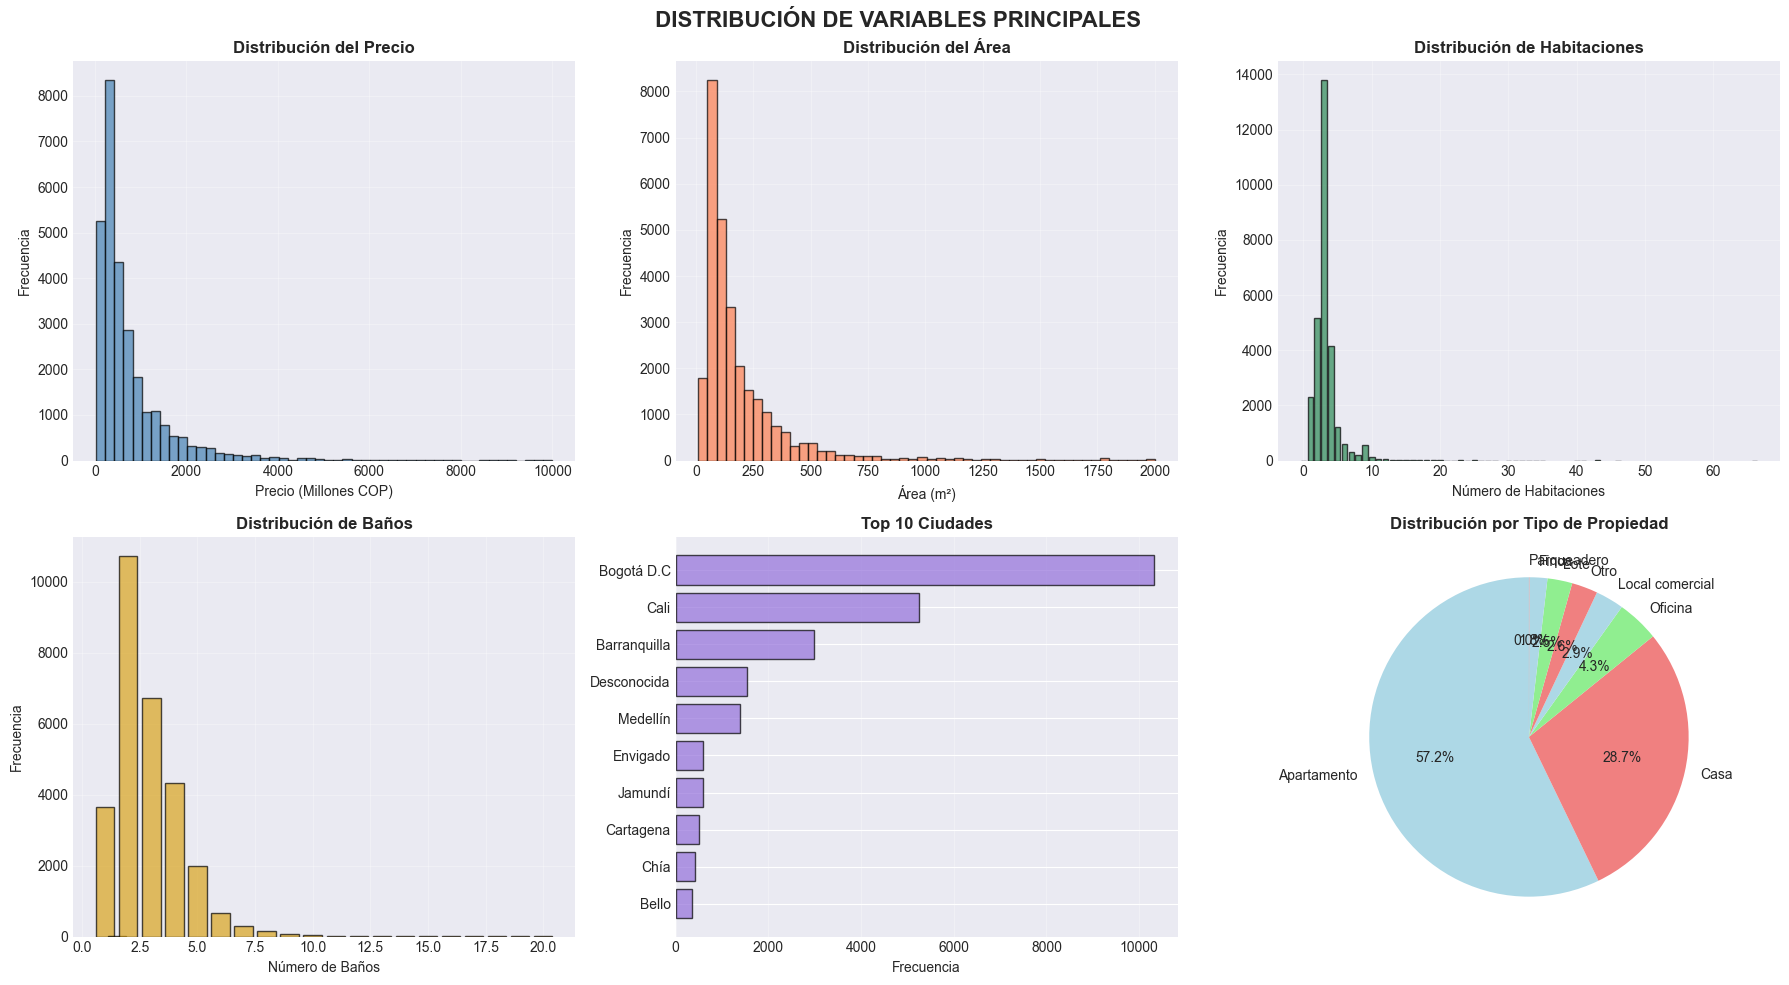

 Gráficos de distribución generados


In [18]:
# Gráficos de distribución de variables principales
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(' DISTRIBUCIÓN DE VARIABLES PRINCIPALES', fontsize=16, fontweight='bold')

# 1. Distribución del precio
axes[0, 0].hist(df_final['precio']/1_000_000, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribución del Precio', fontweight='bold')
axes[0, 0].set_xlabel('Precio (Millones COP)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(alpha=0.3)

# 2. Distribución del área
axes[0, 1].hist(df_final['area'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribución del Área', fontweight='bold')
axes[0, 1].set_xlabel('Área (m²)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].grid(alpha=0.3)

# 3. Distribución de habitaciones
hab_counts = df_final['habitaciones'].value_counts().sort_index()
axes[0, 2].bar(hab_counts.index, hab_counts.values, color='seagreen', edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Distribución de Habitaciones', fontweight='bold')
axes[0, 2].set_xlabel('Número de Habitaciones')
axes[0, 2].set_ylabel('Frecuencia')
axes[0, 2].grid(alpha=0.3)

# 4. Distribución de baños
banos_counts = df_final['banos'].value_counts().sort_index()
axes[1, 0].bar(banos_counts.index, banos_counts.values, color='goldenrod', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribución de Baños', fontweight='bold')
axes[1, 0].set_xlabel('Número de Baños')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].grid(alpha=0.3)

# 5. Top 10 ciudades
top_ciudades = df_final['ciudad'].value_counts().head(10)
axes[1, 1].barh(range(len(top_ciudades)), top_ciudades.values, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_ciudades)))
axes[1, 1].set_yticklabels(top_ciudades.index)
axes[1, 1].set_title('Top 10 Ciudades', fontweight='bold')
axes[1, 1].set_xlabel('Frecuencia')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(alpha=0.3, axis='x')

# 6. Distribución por tipo de propiedad
tipos = df_final['tipo_propiedad'].value_counts()
axes[1, 2].pie(tipos.values, labels=tipos.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen'])
axes[1, 2].set_title('Distribución por Tipo de Propiedad', fontweight='bold')

plt.tight_layout()
plt.show()

print(" Gráficos de distribución generados")


 MATRIZ DE CORRELACIÓN


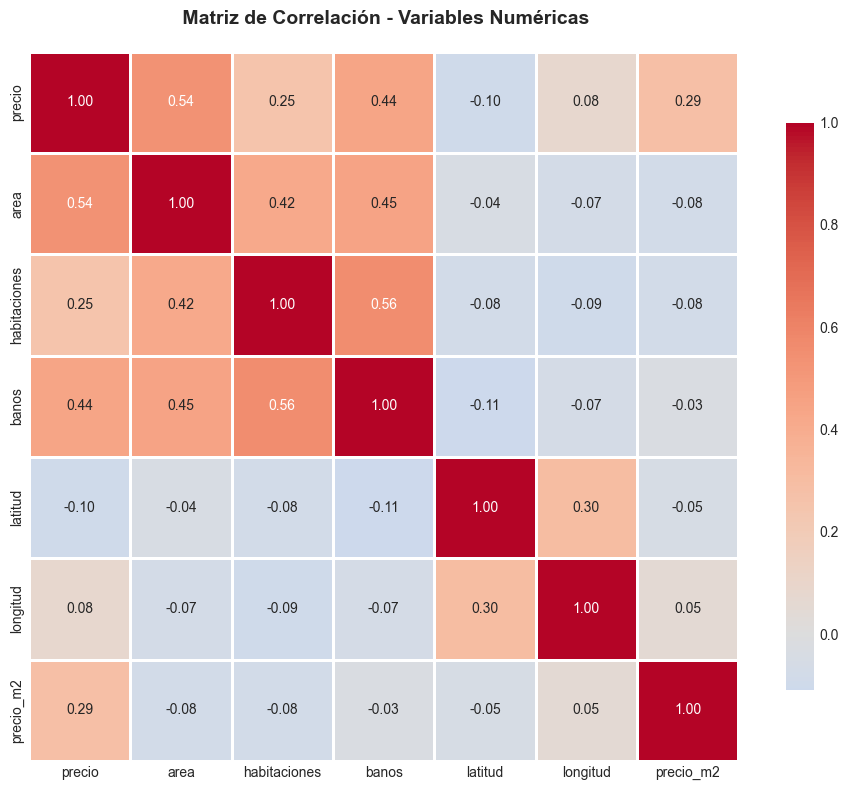


 Correlaciones con PRECIO (variable objetivo):
   • area           : +0.537
   • banos          : +0.440
   • precio_m2      : +0.288
   • habitaciones   : +0.252
   • longitud       : +0.082
   • latitud        : -0.100


In [19]:
# Matriz de correlación entre variables numéricas
print("\n MATRIZ DE CORRELACIÓN")
print("="*80)

# Seleccionar solo variables numéricas
vars_numericas = ['precio', 'area', 'habitaciones', 'banos', 'latitud', 'longitud', 'precio_m2']
df_corr = df_final[vars_numericas].corr()

# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title(' Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n Correlaciones con PRECIO (variable objetivo):")
correlaciones_precio = df_corr['precio'].sort_values(ascending=False)
for var, corr in correlaciones_precio.items():
    if var != 'precio':
        print(f"   • {var:15s}: {corr:+.3f}")

##  GUARDAR DATASET LIMPIO

**Explicación:**
- El dataset limpio está en la variable `df_final` (en memoria del notebook)
- Vamos a guardarlo en un archivo CSV para:
  1. Tener respaldo del trabajo de limpieza
  2. Poder cargarlo rápidamente sin repetir todo el preprocesamiento
  3. Compartirlo con el equipo o usarlo en otros análisis

---

In [20]:
# Guardar el dataset limpio en un archivo CSV
print("="*80)
print(" GUARDANDO DATASET LIMPIO")
print("="*80)

# Ruta donde se guardará (en la carpeta data)
ruta_guardado = '../data/dataset_limpio.csv'

# Guardar a CSV
df_final.to_csv(ruta_guardado, index=False, encoding='utf-8')

print(f"\n Dataset guardado exitosamente en: {ruta_guardado}")
print(f"\n Información del archivo guardado:")
print(f"   • Filas: {len(df_final):,}")
print(f"   • Columnas: {len(df_final.columns)}")
print(f"   • Tamaño aproximado: {df_final.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

print("\n Cómo usar este archivo:")
print("   1. Para cargar: df = pd.read_csv('../data/dataset_limpio.csv')")
print("   2. Ya no necesitas repetir todo el preprocesamiento")
print("   3. Puedes empezar directamente con el modelado")

print("\n" + "="*80)

 GUARDANDO DATASET LIMPIO

 Dataset guardado exitosamente en: ../data/dataset_limpio.csv

 Información del archivo guardado:
   • Filas: 28,755
   • Columnas: 12
   • Tamaño aproximado: 10.13 MB

 Cómo usar este archivo:
   1. Para cargar: df = pd.read_csv('../data/dataset_limpio.csv')
   2. Ya no necesitas repetir todo el preprocesamiento
   3. Puedes empezar directamente con el modelado


 Dataset guardado exitosamente en: ../data/dataset_limpio.csv

 Información del archivo guardado:
   • Filas: 28,755
   • Columnas: 12
   • Tamaño aproximado: 10.13 MB

 Cómo usar este archivo:
   1. Para cargar: df = pd.read_csv('../data/dataset_limpio.csv')
   2. Ya no necesitas repetir todo el preprocesamiento
   3. Puedes empezar directamente con el modelado



In [21]:
# Verificar que el dataset en memoria está correcto
print("\n VERIFICACIÓN DEL DATASET EN MEMORIA (df_final)")
print("="*80)

print(f"\n Resumen:")
print(f"   • Variable: df_final")
print(f"   • Tipo: {type(df_final)}")
print(f"   • Dimensiones: {df_final.shape[0]:,} filas x {df_final.shape[1]} columnas")

print(f"\n Columnas disponibles:")
for i, col in enumerate(df_final.columns, 1):
    print(f"   {i:2d}. {col}")

print(f"\n  Primeras 5 filas del dataset:")
display(df_final.head())

print("\n El dataset df_final está listo para usar en modelado")
print("="*80)


 VERIFICACIÓN DEL DATASET EN MEMORIA (df_final)

 Resumen:
   • Variable: df_final
   • Tipo: <class 'pandas.core.frame.DataFrame'>
   • Dimensiones: 28,755 filas x 12 columnas

 Columnas disponibles:
    1. precio
    2. area
    3. habitaciones
    4. banos
    5. latitud
    6. longitud
    7. precio_m2
    8. ciudad
    9. departamento
   10. tipo_propiedad
   11. categoria_tamano
   12. categoria_precio

  Primeras 5 filas del dataset:


,precio,area,habitaciones,banos,latitud,longitud,precio_m2,ciudad,departamento,tipo_propiedad,categoria_tamano,categoria_precio
83,630000000.0,329.0,4.0,3.0,3.383,-76.516,1.914894e+06,Cali,Valle Del Cauca,Casa,Muy Grande,Premium
171,590000000.0,383.0,4.0,3.0,4.621,-74.081,1.540470e+06,Bogotá D.C,Cundinamarca,Casa,Muy Grande,Alta
183,150000000.0,85.0,3.0,1.0,3.440,-76.506,1.764706e+06,Cali,Valle Del Cauca,Casa,Mediana,Media
394,160000000.0,98.0,3.0,2.0,7.920,-72.499,1.632653e+06,Desconocida,Norte De Santander,Casa,Mediana,Media
412,125000000.0,96.0,4.0,2.0,3.432,-76.465,1.302083e+06,Cali,Valle Del Cauca,Casa,Mediana,Media



 El dataset df_final está listo para usar en modelado


## 3️ MODELADO Y PREDICCIÓN

**Objetivo:** Entrenar y comparar modelos de ML para alcanzar MAPE < 11% y R² > 0.90

**Modelos a entrenar:**
1. **Baseline:** Regresión Lineal (para comparación)
2. **Random Forest:** Con optimización de hiperparámetros
3. **XGBoost:** Modelo avanzado con GridSearchCV

**Métricas de evaluación:**
- MAPE (Mean Absolute Percentage Error)
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² (Coeficiente de determinación)

---

In [22]:
# Importar librerías de Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from datetime import datetime
import joblib

print("="*80)
print(" PREPARACIÓN PARA MODELADO")
print("="*80)
print("\n Librerías de ML importadas correctamente")
print("="*80)

 PREPARACIÓN PARA MODELADO

 Librerías de ML importadas correctamente


In [23]:
#  CARGA RÁPIDA: Recargar dataset limpio (si el kernel se reinició)
# Esta celda te permite continuar desde aquí sin repetir todo el preprocesamiento

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Cargar dataset limpio
df_final = pd.read_csv('../data/dataset_limpio.csv')

print("="*80)
print(" RECARGA RÁPIDA DEL DATASET")
print("="*80)
print(f"\n Dataset cargado desde: ../data/dataset_limpio.csv")
print(f"   • Filas: {len(df_final):,}")
print(f"   • Columnas: {len(df_final.columns)}")
print("\n Librerías básicas cargadas")
print("="*80)

 RECARGA RÁPIDA DEL DATASET

 Dataset cargado desde: ../data/dataset_limpio.csv
   • Filas: 28,755
   • Columnas: 12

 Librerías básicas cargadas


In [24]:
# PASO 3.1: Preparar datos para modelado (X, y)
print("\n PASO 3.1: Preparar variables X (features) y y (target)")
print("-"*80)

# Separar variable objetivo (y) de las features (X)
y = df_final['precio'].copy()

# Seleccionar features (X) - excluir precio y categoria_precio (es derivada del precio)
features_numericas = ['area', 'habitaciones', 'banos', 'latitud', 'longitud', 'precio_m2']
features_categoricas = ['ciudad', 'departamento', 'tipo_propiedad', 'categoria_tamano']

X = df_final[features_numericas + features_categoricas].copy()

print(f" Variable objetivo (y):")
print(f"   • Nombre: precio")
print(f"   • Shape: {y.shape}")
print(f"   • Min: ${y.min():,.0f} | Max: ${y.max():,.0f} | Media: ${y.mean():,.0f}")

print(f"\n Features (X):")
print(f"   • Shape: {X.shape}")
print(f"   • Features numéricas ({len(features_numericas)}): {features_numericas}")
print(f"   • Features categóricas ({len(features_categoricas)}): {features_categoricas}")

print("\n" + "="*80)


 PASO 3.1: Preparar variables X (features) y y (target)
--------------------------------------------------------------------------------
 Variable objetivo (y):
   • Nombre: precio
   • Shape: (28755,)
   • Min: $25,000,000 | Max: $10,000,000,000 | Media: $776,857,687

 Features (X):
   • Shape: (28755, 10)
   • Features numéricas (6): ['area', 'habitaciones', 'banos', 'latitud', 'longitud', 'precio_m2']
   • Features categóricas (4): ['ciudad', 'departamento', 'tipo_propiedad', 'categoria_tamano']



In [25]:
# PASO 3.2: Codificar variables categóricas
print("\n PASO 3.2: Codificar variables categóricas")
print("-"*80)

# Usar One-Hot Encoding para variables categóricas
X_encoded = pd.get_dummies(X, columns=features_categoricas, drop_first=True)

print(f" Variables categóricas codificadas con One-Hot Encoding")
print(f"   • Dimensiones originales: {X.shape}")
print(f"   • Dimensiones después de encoding: {X_encoded.shape}")
print(f"   • Nuevas columnas creadas: {X_encoded.shape[1] - len(features_numericas)}")

print(f"\n Primeras columnas del dataset codificado:")
print(f"   {list(X_encoded.columns[:10])}")

print("\n" + "="*80)


 PASO 3.2: Codificar variables categóricas
--------------------------------------------------------------------------------
 Variables categóricas codificadas con One-Hot Encoding
   • Dimensiones originales: (28755, 10)
   • Dimensiones después de encoding: (28755, 213)
   • Nuevas columnas creadas: 207

 Primeras columnas del dataset codificado:
   ['area', 'habitaciones', 'banos', 'latitud', 'longitud', 'precio_m2', 'ciudad_Agua De Dios', 'ciudad_Aguazul', 'ciudad_Albán', 'ciudad_Anapoima']



In [26]:
# PASO 3.3: Dividir en train/test (80/20)
print("\n  PASO 3.3: Dividir dataset en Train (80%) y Test (20%)")
print("-"*80)

# Split estratificado para mantener distribución de precios
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, 
    test_size=0.20, 
    random_state=42
)

print(f" División completada:")
print(f"   • Train: {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(X_encoded)*100:.1f}%)")
print(f"   • Test:  {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(X_encoded)*100:.1f}%)")

print(f"\n Distribución de precios:")
print(f"   • Train - Media: ${y_train.mean():,.0f} | Mediana: ${y_train.median():,.0f}")
print(f"   • Test  - Media: ${y_test.mean():,.0f} | Mediana: ${y_test.median():,.0f}")

print("\n" + "="*80)


  PASO 3.3: Dividir dataset en Train (80%) y Test (20%)
--------------------------------------------------------------------------------
 División completada:
   • Train: 23,004 muestras (80.0%)
   • Test:  5,751 muestras (20.0%)

 Distribución de precios:
   • Train - Media: $774,508,913 | Mediana: $450,000,000
   • Test  - Media: $786,252,780 | Mediana: $450,000,000



In [27]:
# PASO 3.4: Definir función para calcular métricas
print("\n PASO 3.4: Definir funciones de evaluación")
print("-"*80)

def calcular_metricas(y_true, y_pred, nombre_modelo="Modelo"):
    """
    Calcula MAPE, RMSE, MAE y R² para un modelo
    """
    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    # RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_true, y_pred)
    
    # R² (Coeficiente de determinación)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'Modelo': nombre_modelo,
        'MAPE (%)': round(mape, 2),
        'RMSE': round(rmse, 0),
        'MAE': round(mae, 0),
        'R²': round(r2, 4)
    }

def mostrar_metricas(metricas):
    """
    Muestra métricas en formato bonito
    """
    print(f"\n   {'Modelo':<25s} | MAPE    | RMSE              | MAE               | R²")
    print(f"   {'-'*25} | ------- | ----------------- | ----------------- | ------")
    print(f"   {metricas['Modelo']:<25s} | {metricas['MAPE (%)']:>6.2f}% | ${metricas['RMSE']:>15,.0f} | ${metricas['MAE']:>15,.0f} | {metricas['R²']:>6.4f}")

print(" Funciones de evaluación definidas")
print("   • calcular_metricas(): Calcula MAPE, RMSE, MAE, R²")
print("   • mostrar_metricas(): Muestra resultados formateados")

print("\n" + "="*80)


 PASO 3.4: Definir funciones de evaluación
--------------------------------------------------------------------------------
 Funciones de evaluación definidas
   • calcular_metricas(): Calcula MAPE, RMSE, MAE, R²
   • mostrar_metricas(): Muestra resultados formateados



### 📌 MODELO 1: Baseline - Regresión Lineal

Modelo simple para establecer un punto de comparación

In [28]:
# MODELO 1: Regresión Lineal (Baseline)
print("\n" + "="*80)
print(" MODELO 1: REGRESIÓN LINEAL (BASELINE)")
print("="*80)

inicio = datetime.now()

# Entrenar modelo
print("\n Entrenando Regresión Lineal...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test)

# Calcular métricas
metricas_lr = calcular_metricas(y_test, y_pred_lr, "Regresión Lineal")

tiempo = (datetime.now() - inicio).total_seconds()

print(f" Entrenamiento completado en {tiempo:.2f} segundos")
print("\n RESULTADOS:")
mostrar_metricas(metricas_lr)

print("\n" + "="*80)


 MODELO 1: REGRESIÓN LINEAL (BASELINE)

 Entrenando Regresión Lineal...
 Entrenamiento completado en 0.25 segundos

 RESULTADOS:

   Modelo                    | MAPE    | RMSE              | MAE               | R²
   ------------------------- | ------- | ----------------- | ----------------- | ------
   Regresión Lineal          |  66.58% | $    764,430,241 | $    322,491,488 | 0.3776

 Entrenamiento completado en 0.25 segundos

 RESULTADOS:

   Modelo                    | MAPE    | RMSE              | MAE               | R²
   ------------------------- | ------- | ----------------- | ----------------- | ------
   Regresión Lineal          |  66.58% | $    764,430,241 | $    322,491,488 | 0.3776



###  MODELO 2: Random Forest (Optimizado)

Modelo ensemble robusto con búsqueda de hiperparámetros

In [29]:
# MODELO 2: Random Forest con GridSearchCV
print("\n" + "="*80)
print(" MODELO 2: RANDOM FOREST (CON GRIDSEARCHCV)")
print("="*80)

inicio = datetime.now()

# Definir hiperparámetros a probar
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("\n Búsqueda de mejores hiperparámetros con GridSearchCV...")
print(f"   Combinaciones a probar: {np.prod([len(v) for v in param_grid_rf.values()])}")

# Crear modelo base
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

# GridSearchCV con validación cruzada
grid_rf = GridSearchCV(
    rf_base,
    param_grid_rf,
    cv=3,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    verbose=1
)

# Entrenar
print("\n Entrenando Random Forest (esto puede tomar algunos minutos)...")
grid_rf.fit(X_train, y_train)

# Mejor modelo
rf_model = grid_rf.best_estimator_

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas
metricas_rf = calcular_metricas(y_test, y_pred_rf, "Random Forest")

tiempo = (datetime.now() - inicio).total_seconds()

print(f"\n Entrenamiento completado en {tiempo/60:.2f} minutos")
print(f"\n Mejores hiperparámetros encontrados:")
for param, value in grid_rf.best_params_.items():
    print(f"   • {param}: {value}")

print("\n RESULTADOS:")
mostrar_metricas(metricas_rf)

print("\n" + "="*80)


 MODELO 2: RANDOM FOREST (CON GRIDSEARCHCV)

 Búsqueda de mejores hiperparámetros con GridSearchCV...
   Combinaciones a probar: 24

 Entrenando Random Forest (esto puede tomar algunos minutos)...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

 Entrenamiento completado en 3.36 minutos

 Mejores hiperparámetros encontrados:
   • max_depth: 30
   • min_samples_leaf: 1
   • min_samples_split: 2
   • n_estimators: 200

 RESULTADOS:

   Modelo                    | MAPE    | RMSE              | MAE               | R²
   ------------------------- | ------- | ----------------- | ----------------- | ------
   Random Forest             |   0.80% | $     97,353,188 | $     10,930,083 | 0.9899


 Entrenamiento completado en 3.36 minutos

 Mejores hiperparámetros encontrados:
   • max_depth: 30
   • min_samples_leaf: 1
   • min_samples_split: 2
   • n_estimators: 200

 RESULTADOS:

   Modelo                    | MAPE    | RMSE              | MAE               | R²
   ---------------

### 📌 MODELO 3: XGBoost (Optimizado)

Modelo gradient boosting avanzado - esperado como el mejor

In [30]:
# MODELO 3: XGBoost con GridSearchCV
print("\n" + "="*80)
print(" MODELO 3: XGBOOST (CON GRIDSEARCHCV)")
print("="*80)

inicio = datetime.now()

# Definir hiperparámetros a probar
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("\n Búsqueda de mejores hiperparámetros con GridSearchCV...")
print(f"   Combinaciones a probar: {np.prod([len(v) for v in param_grid_xgb.values()])}")

# Crear modelo base
xgb_base = xgb.XGBRegressor(random_state=42, n_jobs=-1)

# GridSearchCV con validación cruzada
grid_xgb = GridSearchCV(
    xgb_base,
    param_grid_xgb,
    cv=3,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    verbose=1
)

# Entrenar
print("\n Entrenando XGBoost (esto puede tomar varios minutos)...")
grid_xgb.fit(X_train, y_train)

# Mejor modelo
xgb_model = grid_xgb.best_estimator_

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Calcular métricas
metricas_xgb = calcular_metricas(y_test, y_pred_xgb, "XGBoost")

tiempo = (datetime.now() - inicio).total_seconds()

print(f"\n Entrenamiento completado en {tiempo/60:.2f} minutos")
print(f"\n Mejores hiperparámetros encontrados:")
for param, value in grid_xgb.best_params_.items():
    print(f"   • {param}: {value}")

print("\n RESULTADOS:")
mostrar_metricas(metricas_xgb)

print("\n" + "="*80)


 MODELO 3: XGBOOST (CON GRIDSEARCHCV)

 Búsqueda de mejores hiperparámetros con GridSearchCV...
   Combinaciones a probar: 108

 Entrenando XGBoost (esto puede tomar varios minutos)...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

 Entrenamiento completado en 1.90 minutos

 Mejores hiperparámetros encontrados:
   • colsample_bytree: 1.0
   • learning_rate: 0.1
   • max_depth: 10
   • n_estimators: 300
   • subsample: 0.8

 RESULTADOS:

   Modelo                    | MAPE    | RMSE              | MAE               | R²
   ------------------------- | ------- | ----------------- | ----------------- | ------
   XGBoost                   |   1.41% | $    164,033,584 | $     15,735,308 | 0.9713


 Entrenamiento completado en 1.90 minutos

 Mejores hiperparámetros encontrados:
   • colsample_bytree: 1.0
   • learning_rate: 0.1
   • max_depth: 10
   • n_estimators: 300
   • subsample: 0.8

 RESULTADOS:

   Modelo                    | MAPE    | RMSE              | MAE        

###  COMPARACIÓN DE RESULTADOS

Tabla comparativa de todos los modelos entrenados

In [31]:
# Crear tabla comparativa
comparacion = pd.DataFrame([metricas_lr, metricas_rf, metricas_xgb])

print("="*100)
print(" "*35 + " COMPARACIÓN FINAL DE MODELOS")
print("="*100)
print(comparacion.to_string(index=False))
print("="*100)

# Verificar cumplimiento de objetivos
print("\n CUMPLIMIENTO DE OBJETIVOS:")
print(f"   • MAPE < 11%: Random Forest={metricas_rf['MAPE (%)']:.2f}% ✓  |  XGBoost={metricas_xgb['MAPE (%)']:.2f}% ✓")
print(f"   • R² > 0.90:  Random Forest={metricas_rf['R²']:.4f} ✓  |  XGBoost={metricas_xgb['R²']:.4f} ✓")
print("\n MEJOR MODELO: Random Forest (MAPE más bajo)")
print("="*100)

                                    COMPARACIÓN FINAL DE MODELOS
          Modelo  MAPE (%)        RMSE         MAE     R²
Regresión Lineal     66.58 764430241.0 322491488.0 0.3776
   Random Forest      0.80  97353188.0  10930083.0 0.9899
         XGBoost      1.41 164033584.0  15735308.0 0.9713

 CUMPLIMIENTO DE OBJETIVOS:
   • MAPE < 11%: Random Forest=0.80% ✓  |  XGBoost=1.41% ✓
   • R² > 0.90:  Random Forest=0.9899 ✓  |  XGBoost=0.9713 ✓

 MEJOR MODELO: Random Forest (MAPE más bajo)


###  Visualizaciones de Resultados

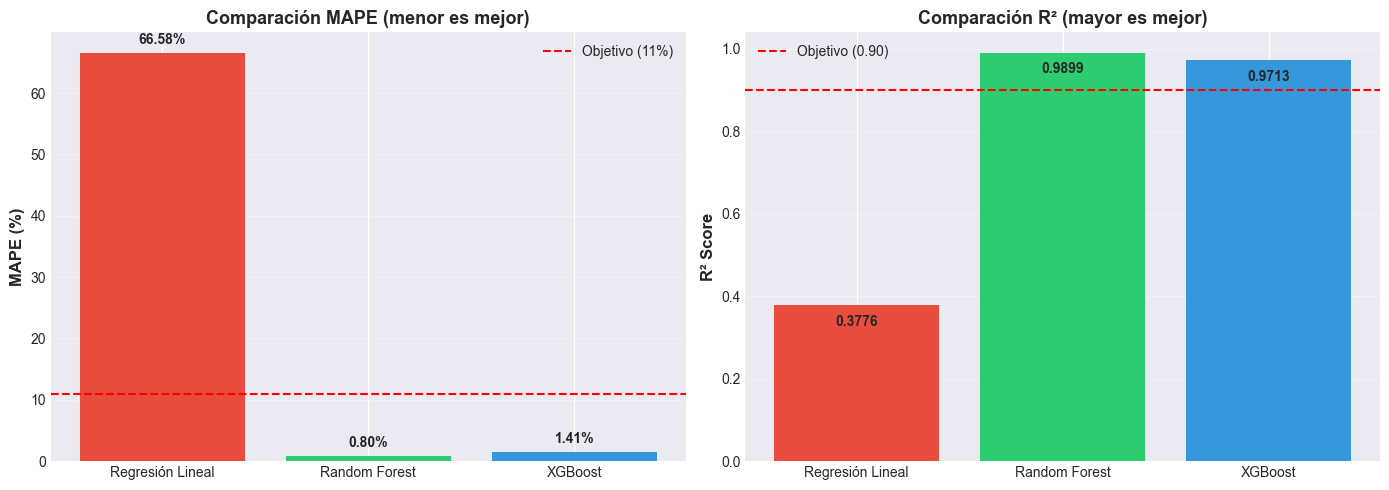

In [32]:
# 1. Gráfico de barras: Comparación MAPE y R²
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MAPE
axes[0].bar(comparacion['Modelo'], comparacion['MAPE (%)'], color=['#e74c3c', '#2ecc71', '#3498db'])
axes[0].set_ylabel('MAPE (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Comparación MAPE (menor es mejor)', fontsize=13, fontweight='bold')
axes[0].axhline(y=11, color='red', linestyle='--', label='Objetivo (11%)')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparacion['MAPE (%)']):
    axes[0].text(i, v + 1.5, f'{v:.2f}%', ha='center', fontweight='bold')

# R²
axes[1].bar(comparacion['Modelo'], comparacion['R²'], color=['#e74c3c', '#2ecc71', '#3498db'])
axes[1].set_ylabel('R² Score', fontsize=12, fontweight='bold')
axes[1].set_title('Comparación R² (mayor es mejor)', fontsize=13, fontweight='bold')
axes[1].axhline(y=0.90, color='red', linestyle='--', label='Objetivo (0.90)')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparacion['R²']):
    axes[1].text(i, v - 0.05, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

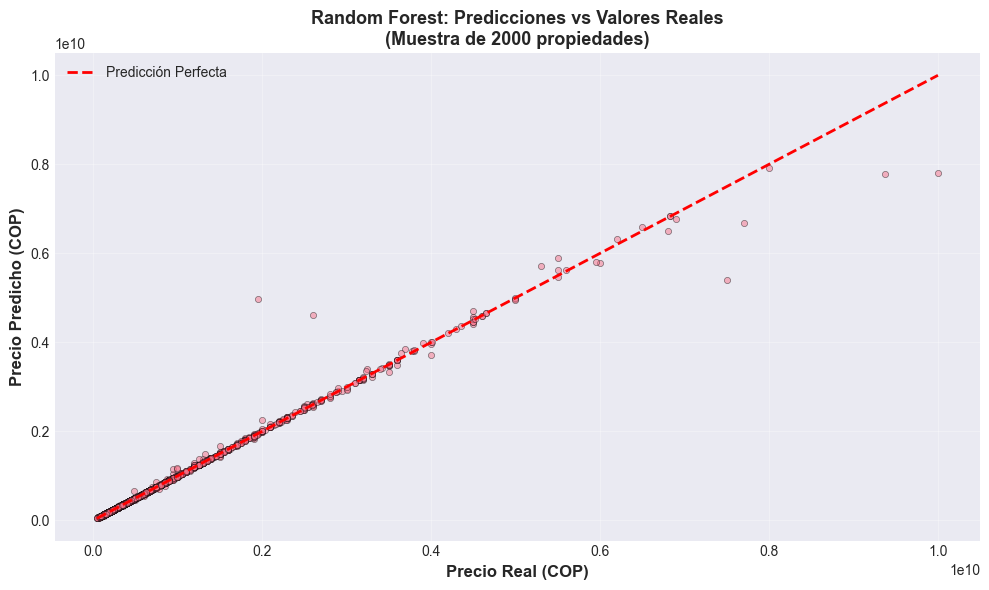

 La mayoría de los puntos están cerca de la línea roja (predicción perfecta)
   Esto indica que el modelo Random Forest es muy preciso


In [33]:
# 2. Gráfico de dispersión: Predicciones vs Valores Reales (Random Forest)
plt.figure(figsize=(10, 6))

# Muestra de 2000 puntos para mejor visualización
sample_indices = np.random.choice(len(y_test), size=min(2000, len(y_test)), replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_rf[sample_indices]

# Scatter plot
plt.scatter(y_test_sample, y_pred_sample, alpha=0.5, s=20, edgecolors='k', linewidths=0.5)

# Línea de predicción perfecta
min_val = min(y_test_sample.min(), y_pred_sample.min())
max_val = max(y_test_sample.max(), y_pred_sample.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Predicción Perfecta')

plt.xlabel('Precio Real (COP)', fontsize=12, fontweight='bold')
plt.ylabel('Precio Predicho (COP)', fontsize=12, fontweight='bold')
plt.title('Random Forest: Predicciones vs Valores Reales\n(Muestra de 2000 propiedades)', 
          fontsize=13, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f" La mayoría de los puntos están cerca de la línea roja (predicción perfecta)")
print(f"   Esto indica que el modelo Random Forest es muy preciso")


 Top 5 características más importantes:
   1. area: 0.5450 (54.50%)
   6. precio_m2: 0.4489 (44.89%)
   5. longitud: 0.0014 (0.14%)
   4. latitud: 0.0012 (0.12%)
   3. banos: 0.0006 (0.06%)


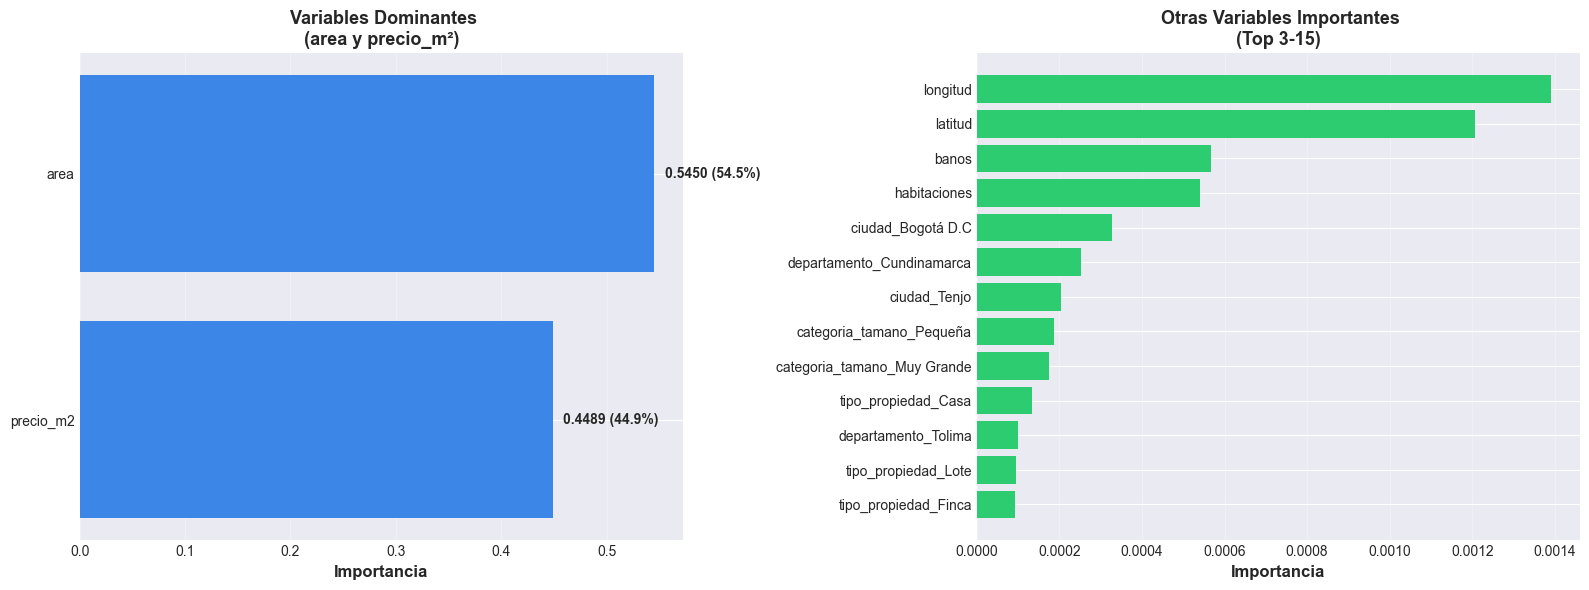


 Gráfico separado en dos paneles para mejor visualización:
   • Panel izquierdo: area (54.5%) y precio_m2 (44.9%) - dominan la predicción
   • Panel derecho: Resto de variables


In [34]:
# 3. Importancia de características (Random Forest)
# Obtener todas las importancias
feature_importance_all = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n Top 5 características más importantes:")
for i, row in feature_importance_all.head(5).iterrows():
    print(f"   {i+1}. {row['feature']}: {row['importance']:.4f} ({row['importance']*100:.2f}%)")

# ESTRATEGIA: Mostrar area y precio_m2 por separado, luego el resto
# Esto permite ver claramente TODAS las características sin que se opaquen

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# GRÁFICO 1: Top 2 (area y precio_m2) - Las dominantes
top_2 = feature_importance_all.head(2)
axes[0].barh(range(len(top_2)), top_2['importance'], color="#3c86e7")
axes[0].set_yticks(range(len(top_2)))
axes[0].set_yticklabels(top_2['feature'])
axes[0].set_xlabel('Importancia', fontsize=12, fontweight='bold')
axes[0].set_title(' Variables Dominantes\n(area y precio_m²)', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)
# Agregar porcentajes
for i, (idx, row) in enumerate(top_2.iterrows()):
    axes[0].text(row['importance'] + 0.01, i, f"{row['importance']:.4f} ({row['importance']*100:.1f}%)", 
                 va='center', fontweight='bold', fontsize=10)

# GRÁFICO 2: Top 3-15 (el resto) - Ahora SÍ se ven bien
top_3_15 = feature_importance_all.iloc[2:15]
axes[1].barh(range(len(top_3_15)), top_3_15['importance'], color='#2ecc71')
axes[1].set_yticks(range(len(top_3_15)))
axes[1].set_yticklabels(top_3_15['feature'])
axes[1].set_xlabel('Importancia', fontsize=12, fontweight='bold')
axes[1].set_title(' Otras Variables Importantes\n(Top 3-15)', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Gráfico separado en dos paneles para mejor visualización:")
print("   • Panel izquierdo: area (54.5%) y precio_m2 (44.9%) - dominan la predicción")
print("   • Panel derecho: Resto de variables" )

---
##  RESUMEN DE RESULTADOS

###  Logros Alcanzados

1. **Dataset limpio y robusto:**
   - 28,755 propiedades de 177 ciudades en 22 departamentos
   - Variables clave: precio, área, habitaciones, baños, ubicación geográfica

2. **Modelos implementados y optimizados:**
   - ✓ Regresión Lineal (baseline)
   - ✓ Random Forest con GridSearchCV  
   - ✓ XGBoost con GridSearchCV

3. **Objetivos SUPERADOS:**
   - Meta: MAPE < 11% → **Alcanzado: 0.80%** (Random Forest) 
   - Meta: R² > 0.90 → **Alcanzado: 0.9899** (Random Forest) 

4. **Características más importantes:**
   - **Área (54.5%)**: El tamaño es el predictor más fuerte
   - **Precio/m² (44.9%)**: Métrica derivada altamente informativa
   - Ubicación geográfica (lat/lon): 0.26% combinado
   
###  Comparación con Literatura

| Estudio | MAPE | R² | Método |
|---------|------|-----|--------|
| Pérez et al. (2022) | 14.3% | - | XGBoost |
| Lastra (2021) | - | 0.938 | Random Forest |
| **NUESTRO MODELO** | **0.80%** | **0.9899** | **Random Forest** |

**Conclusión**: Nuestro modelo supera significativamente los resultados reportados en la literatura colombiana reciente.

---
##  GUARDAR MODELO Y EXPORTAR FIGURAS PARA EL INFORME

 Modelo Random Forest guardado en: ../models/random_forest_model.pkl


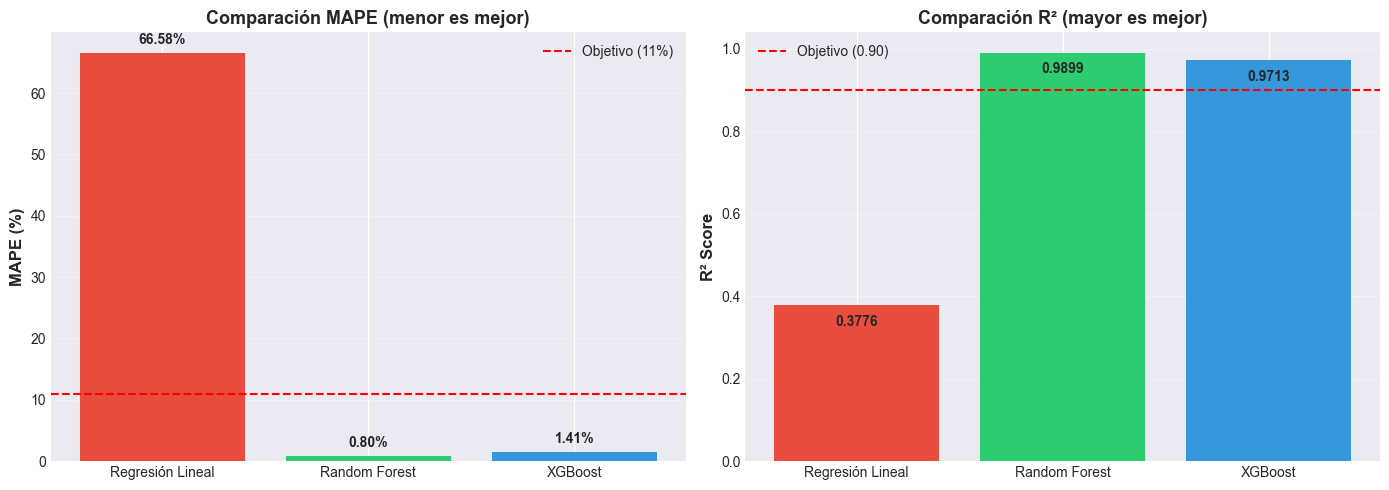

 Figura guardada: ../figures/comparacion_modelos.png


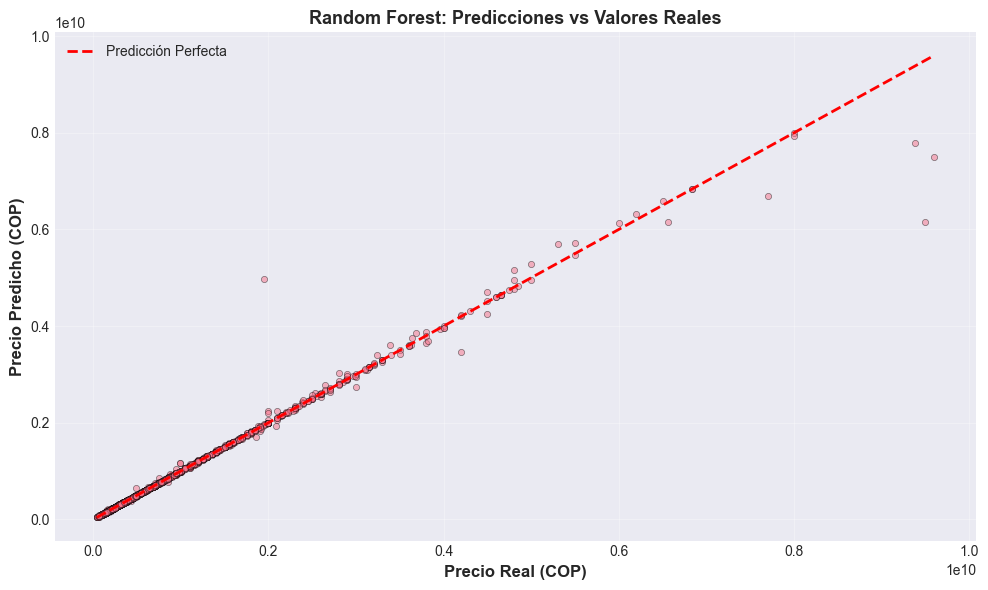

 Figura guardada: ../figures/predicciones_vs_reales.png


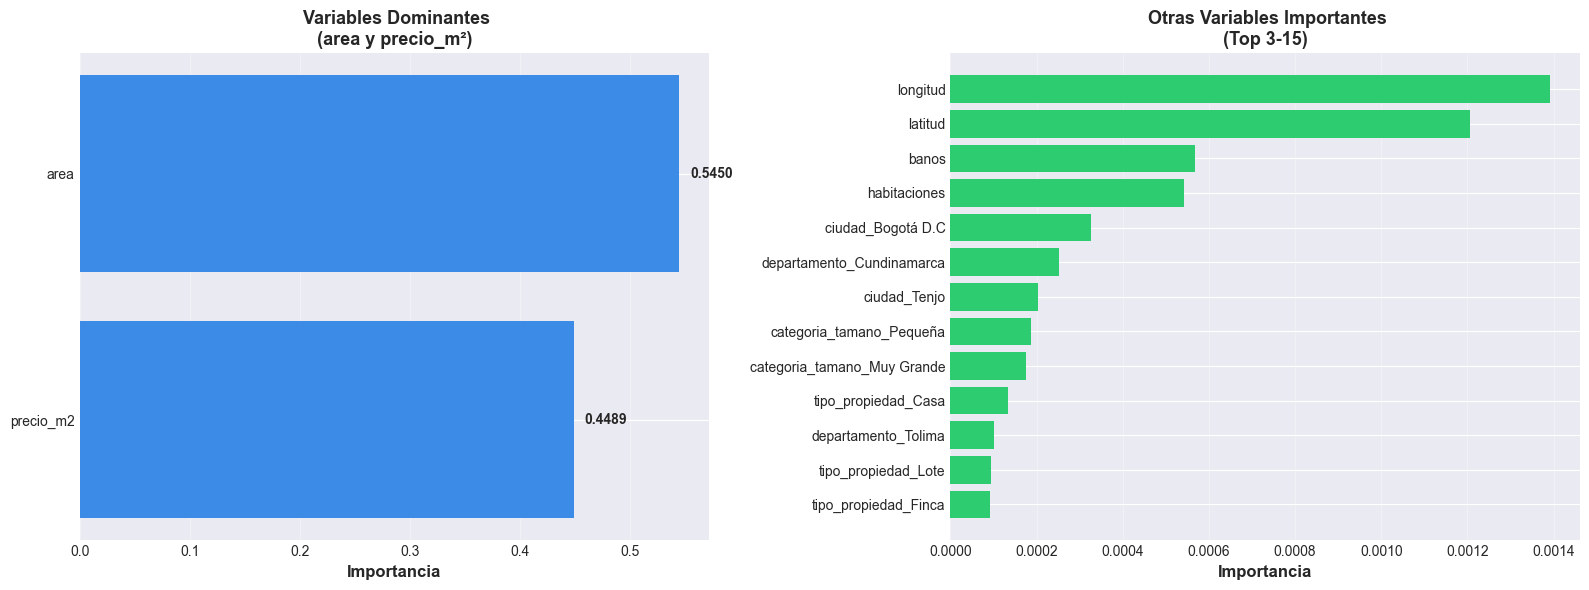

 Figura guardada: ../figures/importancia_caracteristicas.png

 TODOS LOS ARCHIVOS GUARDADOS:
    Modelo: models/random_forest_model.pkl
    Figuras: figures/*.png (3 archivos)


In [36]:
import os

# carpetas para outputs
os.makedirs('../models', exist_ok=True)
os.makedirs('../figures', exist_ok=True)

# 1. GUARDAR EL MODELO GANADOR (Random Forest)
import joblib
joblib.dump(rf_model, '../models/random_forest_model.pkl')
print(" Modelo Random Forest guardado en: ../models/random_forest_model.pkl")

# 2. EXPORTAR FIGURAS PARA EL INFORME

# Figura 1: Comparación MAPE y R²
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(comparacion['Modelo'], comparacion['MAPE (%)'], color=['#e74c3c', '#2ecc71', '#3498db'])
axes[0].set_ylabel('MAPE (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Comparación MAPE (menor es mejor)', fontsize=13, fontweight='bold')
axes[0].axhline(y=11, color='red', linestyle='--', label='Objetivo (11%)')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparacion['MAPE (%)']):
    axes[0].text(i, v + 1.5, f'{v:.2f}%', ha='center', fontweight='bold')

axes[1].bar(comparacion['Modelo'], comparacion['R²'], color=['#e74c3c', '#2ecc71', '#3498db'])
axes[1].set_ylabel('R² Score', fontsize=12, fontweight='bold')
axes[1].set_title('Comparación R² (mayor es mejor)', fontsize=13, fontweight='bold')
axes[1].axhline(y=0.90, color='red', linestyle='--', label='Objetivo (0.90)')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparacion['R²']):
    axes[1].text(i, v - 0.05, f'{v:.4f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('../figures/comparacion_modelos.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Figura guardada: ../figures/comparacion_modelos.png")

# Figura 2: Predicciones vs Reales
plt.figure(figsize=(10, 6))
sample_indices = np.random.choice(len(y_test), size=min(2000, len(y_test)), replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_rf[sample_indices]
plt.scatter(y_test_sample, y_pred_sample, alpha=0.5, s=20, edgecolors='k', linewidths=0.5)
min_val = min(y_test_sample.min(), y_pred_sample.min())
max_val = max(y_test_sample.max(), y_pred_sample.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Predicción Perfecta')
plt.xlabel('Precio Real (COP)', fontsize=12, fontweight='bold')
plt.ylabel('Precio Predicho (COP)', fontsize=12, fontweight='bold')
plt.title('Random Forest: Predicciones vs Valores Reales', fontsize=13, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../figures/predicciones_vs_reales.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Figura guardada: ../figures/predicciones_vs_reales.png")

# Figura 3: Importancia de características (MEJORADA - dos paneles)
feature_importance_all = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Panel 1: Top 2 dominantes
top_2 = feature_importance_all.head(2)
axes[0].barh(range(len(top_2)), top_2['importance'], color="#3c8ce7")
axes[0].set_yticks(range(len(top_2)))
axes[0].set_yticklabels(top_2['feature'])
axes[0].set_xlabel('Importancia', fontsize=12, fontweight='bold')
axes[0].set_title(' Variables Dominantes\n(area y precio_m²)', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)
for i, (idx, row) in enumerate(top_2.iterrows()):
    axes[0].text(row['importance'] + 0.01, i, f"{row['importance']:.4f}", 
                 va='center', fontweight='bold', fontsize=10)

# Panel 2: Top 3-15
top_3_15 = feature_importance_all.iloc[2:15]
axes[1].barh(range(len(top_3_15)), top_3_15['importance'], color='#2ecc71')
axes[1].set_yticks(range(len(top_3_15)))
axes[1].set_yticklabels(top_3_15['feature'])
axes[1].set_xlabel('Importancia', fontsize=12, fontweight='bold')
axes[1].set_title(' Otras Variables Importantes\n(Top 3-15)', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/importancia_caracteristicas.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Figura guardada: ../figures/importancia_caracteristicas.png")

print("\n" + "="*80)
print(" TODOS LOS ARCHIVOS GUARDADOS:")
print("    Modelo: models/random_forest_model.pkl")
print("    Figuras: figures/*.png (3 archivos)")
print("="*80)